In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_excel(r"data\health_screenings_2020_1000ea.xlsx") 
data

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,1,0,0,NaN,NaN,2021-12-29
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,NaN,NaN,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,NaN,NaN,2021-12-29
3,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,1,0,1,0.0,0.0,2021-12-29
4,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,1,0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,48,1,12,165,70,92.0,0.5,0.9,1,...,0.8,21.0,30.0,39.0,3,1,0,NaN,NaN,2021-12-29
996,2020,41,1,12,165,70,88.0,1.2,1.0,1,...,0.7,29.0,37.0,21.0,2,0,1,0.0,0.0,2021-12-29
997,2020,48,2,14,155,55,80.2,0.5,0.6,1,...,0.9,36.0,35.0,34.0,1,1,1,1.0,1.0,2021-12-29
998,2020,41,2,14,150,55,79.5,1.0,1.0,1,...,0.7,30.0,29.0,20.0,1,0,0,NaN,NaN,2021-12-29


In [11]:
# 성별 음주 여부 및 흡연 상태 막대 그래프

data.columns

Index(['year', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'eye_left', 'eye_right', 'hear_left', 'hear_right', 'systolic',
       'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides', 'HDL',
       'LDL', 'hemoglobin', 'urine_protein', 'serum', 'AST', 'ALT', 'GTP',
       'smoking', 'drinking', 'oral_check', 'dental_caries', 'tartar',
       'open_date'],
      dtype='object')

In [15]:
# 원래의 data라는 DataFrame에서 ‘gender’, ‘height’, ‘weight’, ‘waist’, ‘smoking’, 그리고 ‘drinking’ 열만을 선택하여 새로운 DataFrame인 data1을 생성
data1 = data.loc[:, ['gender', 'height', 'weight', 'waist','smoking', 'drinking']]

# data1.loc[data1['gender']==1, ['gender']]


,gender
0,1
3,1
5,1
6,1
7,1
...,...
991,1
994,1
995,1
996,1


In [39]:

gender= {1:'Male',2:'Female'}


In [40]:
# 셩별, 음주여부 별, 음주 인원 수 막대 그래프
drinking = data1.groupby(['gender','drinking'])['drinking'].count() # 리스트형식
#drinking = data1.groupby(['gender','drinking'])[['drinking']].count() # [[]] 두개 하면 데이타프레임 형식
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()

drinking['gender'] = drinking['gender'].map(gender)
drinking['drinking'] = drinking['drinking'].replace(0,'Non-drinking').replace(1,'Drinking')

drinking


,gender,drinking,count
0,Male,Non-drinking,126
1,Male,Drinking,356
2,Female,Non-drinking,305
3,Female,Drinking,213


In [47]:
# 셩별, 흡연여부 별, 흡연 인원 수 막대 그래프
# smoking = data1.groupby(['gender','smoking'])[['smoking']].count()  # [[]] 두개 하면 데이타프레임 형식
smoking = data1.groupby(['gender','smoking'])['smoking'].count() # 리스트형식
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()

smoking['gender'] = smoking['gender'].map(gender)
smoking['smoking'] = smoking['smoking'].replace(1,'Non-smoking').replace(2,'Non-smoking').replace(3,'Smoking')
smoking


,gender,smoking,count
0,Male,Non-smoking,145
1,Male,Non-smoking,176
2,Male,Smoking,161
3,Female,Non-smoking,488
4,Female,Non-smoking,12
5,Female,Smoking,18


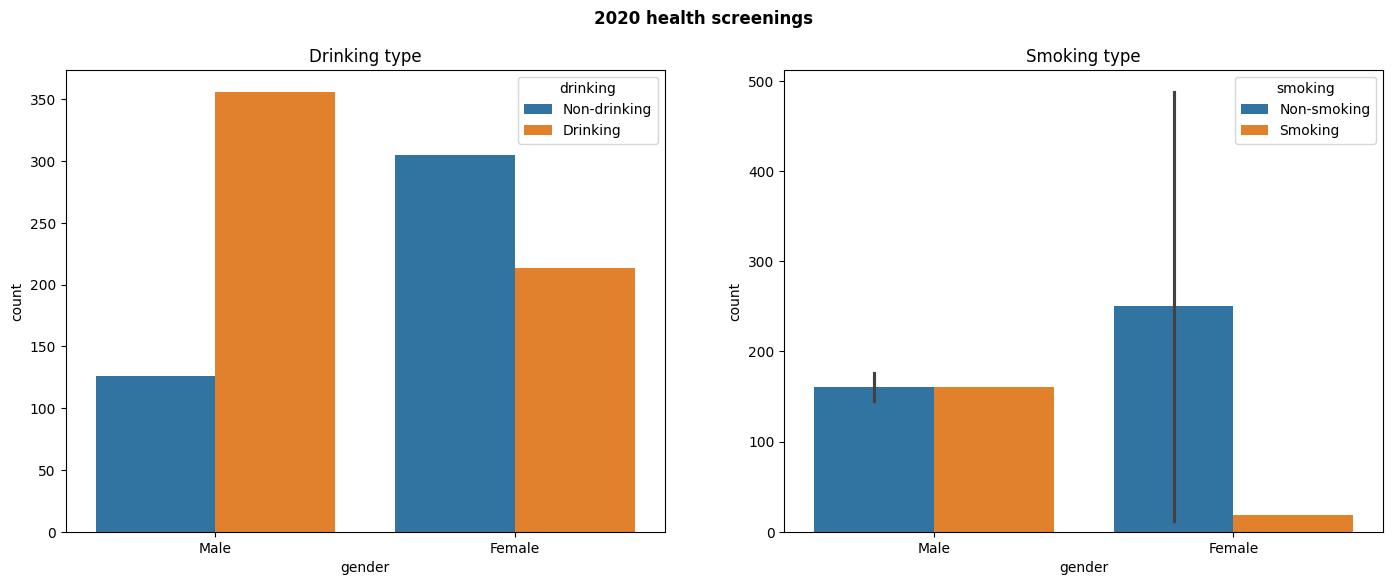

In [58]:
# 성별 음주여부 및 흡연상태 막대 그래프

fig = plt.figure(figsize=(17,6))
# 두개 만들 때 객체 생성 필요하다

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

ax1 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area1)
ax2 = sns.barplot(data=smoking, x='gender', y='count', hue='smoking', ax=area2)

fig.suptitle('2020 health screenings', fontweight='bold')

ax1.set_title('Drinking type')
ax2.set_title('Smoking type')

plt.show()

In [64]:
# 히트맵 그래프
# 몸무게와 허리둘레 가지고 그리기
data2 = data.loc[ : , ['gender', 'weight', 'waist']]
data2. corr()


,gender,weight,waist
gender,1.000000,-0.582641,-0.431970
weight,-0.582641,1.000000,0.787645
waist,-0.431970,0.787645,1.000000


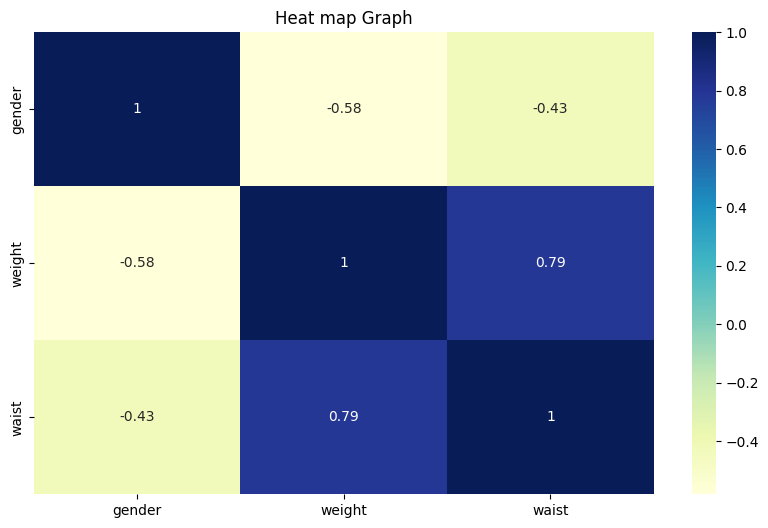

In [68]:
plt.figure(figsize=(10,6))
plt.title('Heat map Graph')

corr_data1 = data2.corr()
sns.heatmap(data=corr_data1, annot=True, cmap='YlGnBu')

plt.show()